In [ ]:
!pip3 install -U pip
!pip3 install opencv-python

In [4]:
import sys
sys.path.append('/home/mhasan3/Desktop/WorkFolder')

In [17]:
# import the necessary keras packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from loader_util.preprocessing import ImageToArrayPreprocessor, \
    AspectAwarePreprocessor
from loader_util.datasets import SimpleDatasetLoader
from loader_util.nn.conv import FCHeadNet, MinVGGNet
##
from tensorflow.keras.optimizers import RMSprop, SGD
import matplotlib.pyplot as plt
from imutils import paths
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [11]:
data_dir = r'/home/mhasan3/Desktop/WorkFolder/keras_dir/biblio2/chap2_data_augmentation/flowers17/images/'

# grab the list of images

image_paths = list(paths.list_images(data_dir))
class_names = [pt.split(os.path.sep)[-2] for pt in image_paths]
unique_class_names = np.unique(class_names)
total_classes = len(unique_class_names)
print(f'[INFO] loading {len(image_paths)} images.....')

[INFO] loading 1360 images.....


In [12]:
# initialise the preprocessors
aap = AspectAwarePreprocessor(width=64, height=64)
iap = ImageToArrayPreprocessor()

# load the dataset from disk and then scale raw pixels to [0-1]
sdl = SimpleDatasetLoader(preprocessors=[aap, iap])
data, labels = sdl.load(image_paths,
                        verbose=500)  # type: np.ndarray, np.ndarray
data = data.astype('float') / 255.0

[INFO] processed 500/1360
[INFO] processed 1000/1360


In [13]:
# partition data into train and test splits
trainx, testx, trainy, testy = train_test_split(data,
                                                labels,
                                                test_size=0.25,
                                                random_state=42)
# convert labels to nos
lb = LabelBinarizer()
trainy = lb.fit_transform(trainy)
testy = lb.transform(testy)
# %%

# init the optimizer and model
print(f'[INFO] compiling model.....')
opt = SGD(lr=0.05)
model = MinVGGNet.build(width=64,
                        height=64,
                        depth=3,
                        classes=total_classes)

model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

[INFO] compiling model.....
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
print(f'[INFO] training network.....')
H = model.fit(trainx, trainy, validation_data=(testx, testy),
              batch_size=32, epochs=100, verbose=1)


[INFO] training network.....
Train on 1020 samples, validate on 340 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1020/1020 [==============================] - 13s 12ms/sample - loss: 3.0653 - acc: 0.2392 - val_loss: 5.1733 - val_acc: 0.1206
Epoch 2/100
1020/1020 [==============================] - 1s 633us/sample - loss: 1.8613 - acc: 0.4529 - val_loss: 2.6498 - val_acc: 0.1559
Epoch 3/100
1020/1020 [==============================] - 1s 637us/sample - loss: 1.3634 - acc: 0.5647 - val_loss: 2.5698 - val_acc: 0.2294
Epoch 4/100
1020/1020 [==============================] - 1s 638us/sample - loss: 1.0865 - acc: 0.6549 - val_loss: 2.3782 - val_acc: 0.2147
Epoch 5/100
1020/1020 [==============================] - 1s 639us/sample - loss: 0.7783 - acc: 0.7490 - val_loss: 2.4064 - val_acc: 0.2412
Epoch 6/100
1020/1020 [==============================] - 1s 640us/sample - loss: 0.6375 - acc: 0.7922 - val_loss: 2.0712 - val_acc: 0.3647
Epoch 7/100
1020/1020 [===================

Epoch 57/100
1020/1020 [==============================] - 1s 675us/sample - loss: 0.0057 - acc: 1.0000 - val_loss: 1.8405 - val_acc: 0.5882
Epoch 58/100
1020/1020 [==============================] - 1s 732us/sample - loss: 0.0051 - acc: 0.9990 - val_loss: 1.8561 - val_acc: 0.5794
Epoch 59/100
1020/1020 [==============================] - 1s 716us/sample - loss: 0.0056 - acc: 0.9990 - val_loss: 1.8299 - val_acc: 0.5882
Epoch 60/100
1020/1020 [==============================] - 1s 701us/sample - loss: 0.0037 - acc: 1.0000 - val_loss: 1.8295 - val_acc: 0.5853
Epoch 61/100
1020/1020 [==============================] - 1s 685us/sample - loss: 0.0048 - acc: 0.9990 - val_loss: 1.9235 - val_acc: 0.5794
Epoch 62/100
1020/1020 [==============================] - 1s 684us/sample - loss: 0.0044 - acc: 1.0000 - val_loss: 1.8845 - val_acc: 0.5824
Epoch 63/100
1020/1020 [==============================] - 1s 679us/sample - loss: 0.0050 - acc: 1.0000 - val_loss: 1.8424 - val_acc: 0.5941
Epoch 64/100
1020/10

In [15]:
# %%
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testx, batch_size=32)
print(classification_report(testy.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=unique_class_names))

[INFO] evaluating network...
              precision    recall  f1-score   support

    bluebell       0.62      0.75      0.68        20
   buttercup       0.50      0.50      0.50        22
   coltsfoot       0.53      0.60      0.56        15
     cowslip       0.40      0.30      0.34        20
      crocus       0.58      0.61      0.60        23
    daffodil       0.44      0.44      0.44        18
       daisy       0.89      0.84      0.86        19
   dandelion       0.55      0.60      0.57        20
  fritillary       0.74      0.70      0.72        20
        iris       0.65      0.69      0.67        16
  lilyvalley       0.63      0.52      0.57        23
       pansy       0.65      0.81      0.72        16
    snowdrop       0.67      0.61      0.64        23
   sunflower       0.86      0.95      0.90        19
   tigerlily       0.88      0.78      0.82        27
       tulip       0.18      0.19      0.19        21
  windflower       0.71      0.67      0.69        1

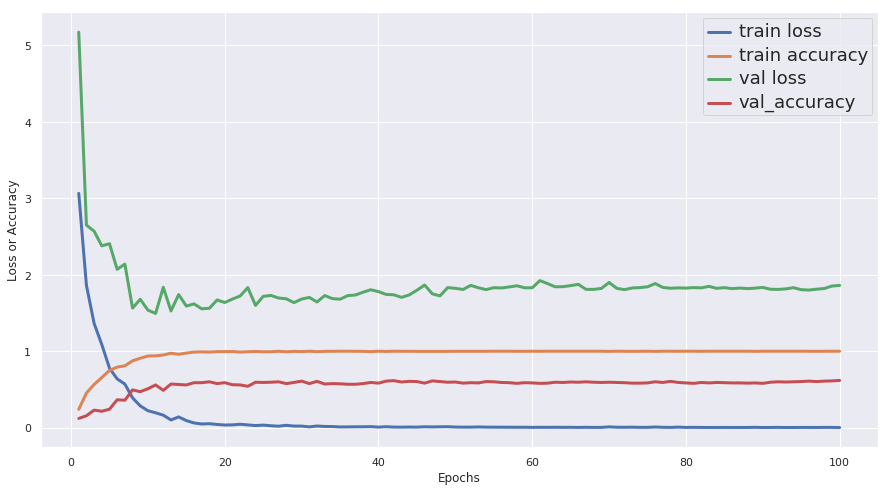

In [19]:
# plot the performance
epochs = range(1, 101)
loss = H.history['loss']
accuracy = H.history['acc']
val_loss = H.history['val_loss']
val_accuracy = H.history['val_acc']
plot_df = pd.DataFrame(
    data=np.c_[epochs, loss, accuracy, val_loss, val_accuracy],
    columns=['epochs', 'loss', 'accuracy', 'val_loss', 'val_accuracy'])

# do the actual plots
sns.set(font_scale=1)
f, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.lineplot(data=plot_df, x='epochs', y='loss', ax=ax, label='train loss',
             linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='accuracy', ax=ax,
             label='train accuracy', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_loss', ax=ax, label='val loss',
             linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_accuracy', ax=ax,
             label='val_accuracy', linewidth=3)
ax.set_ylabel('Loss or Accuracy')
ax.set_xlabel('Epochs')
plt.setp(ax.get_legend().get_texts(), fontsize='18');  